In [926]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [927]:
coffee = pd.read_excel('data/원두 생산량.xlsx')
data = pd.read_excel('data/페레이라.xlsx')

In [928]:
coffee.head()
coffee.tail()

,Area,Element,Item Code (CPC),Year Code,Year,Unit,Value
37,Colombia,Yield,1610,2022,2022,kg/ha,789.40
38,Colombia,Production,1610,2022,2022,t,665015.95
39,Colombia,Area harvested,1610,2023,2023,ha,841354.00
40,Colombia,Yield,1610,2023,2023,kg/ha,809.20
41,Colombia,Production,1610,2023,2023,t,680857.67


In [929]:
data.head()

,지점,지점명,시간(UTC),월평균 기온,일평균 기온의 월표준편차,월평균 일최고기온,월평균 일최저기온,최대 일강수량,월중 최대풍속,월중 최대풍속 날,월일조시간
0,80210,페레이라/마테카나,2010-01-31,23.5,0.7,29.1,18.3,11.3,8.6,NaN,241.0
1,80210,페레이라/마테카나,2010-02-28,23.9,0.7,28.9,18.9,25.2,8.3,23.0,159.0
2,80210,페레이라/마테카나,2010-03-31,23.5,0.6,28.4,18.8,37.9,12.2,10.0,174.0
3,80210,페레이라/마테카나,2010-04-30,22.0,1.2,25.8,18.3,83.4,13.6,3.0,122.0
4,80210,페레이라/마테카나,2010-05-31,22.3,1.3,27.0,18.5,65.8,7.8,14.0,149.0


In [930]:
# 원하는 컬럼만 선택
UTC_rain = data[['시간(UTC)','최대 일강수량']]
UTC_rain = UTC_rain.set_index('시간(UTC)')
UTC_rain.head()

,최대 일강수량
시간(UTC),
2010-01-31,11.3
2010-02-28,25.2
2010-03-31,37.9
2010-04-30,83.4
2010-05-31,65.8


결측치 <hr>

In [931]:
UTC_rain.isnull().sum()

최대 일강수량    24
dtype: int64

In [932]:
# 결측치를 강수량 월평균값으로 채우기
# 강수량 데이터 타입 변경
data['최대 일강수량'] = data['최대 일강수량'].astype('float')

# 연도, 월 값 컬럼 생성
data['월'] = data['시간(UTC)'].dt.month
data['연도'] = data['시간(UTC)'].dt.year
month_rain = data.groupby('월')['최대 일강수량'].mean()
month_rain = list(map(int, month_rain)) 

for idx in range(len(data)):
    if pd.isnull(data.loc[idx, '최대 일강수량']):
        for month in range(1,13):
            if data.loc[idx, '월'] == month:
                data.loc[idx,'최대 일강수량'] = month_rain[month-1]

In [933]:
# 2016년 데이터 확인
print("2016년 데이터 수:")
print(data[data['연도'] == 2016]['최대 일강수량'].count())

print("\n2016년 결측치 수:")
print(data[data['연도'] == 2016]['최대 일강수량'].isnull().sum())

print("\n2016년 월별 데이터:")
print(data[data['연도'] == 2016].groupby('월')['최대 일강수량'].mean())

2016년 데이터 수:
12

2016년 결측치 수:
0

2016년 월별 데이터:
월
1     13.4
2     36.7
3     18.6
4      4.5
5      6.8
6     45.0
7     37.0
8     39.0
9     40.0
10    61.0
11    59.0
12    46.0
Name: 최대 일강수량, dtype: float64


생산량과 년 평균 강수량 <hr>

In [934]:
UTC_rain = data[['시간(UTC)','최대 일강수량']]

In [935]:
# 데이터 전처리
# 1. 커피 생산량 데이터 처리            # 면적당 수확량 선택
coffee_prod = coffee[coffee['Element'] == 'Yield']
coffee_yearly = coffee_prod.set_index('Year')['Value']

# 2. 최대 일강수량 데이터 처리 - 연도별 평균 계산
UTC_rain = data[['시간(UTC)', '최대 일강수량']].copy()
UTC_rain['연도'] = UTC_rain['시간(UTC)'].dt.year
yearly_rain = UTC_rain.groupby('연도')['최대 일강수량'].mean()

In [936]:
# 평균 확인
yearly_rain
yearly_rain.info()

<class 'pandas.core.series.Series'>
Index: 16 entries, 2010 to 2025
Series name: 최대 일강수량
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [937]:
# # 인덱스 타입 변환
# coffee_yearly.index = coffee_yearly.index.astype(int)
# yearly_rain.index = yearly_rain.index.astype(int)
# yearly_rain.dtype

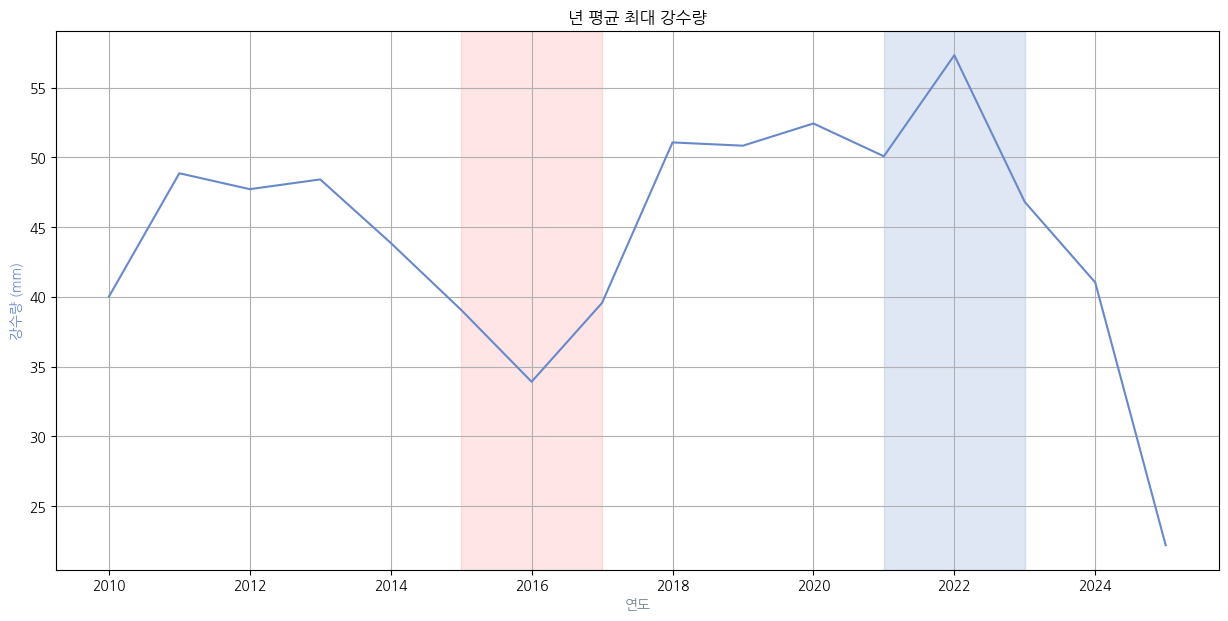

In [938]:
plt.figure(figsize=(15, 7))

plt.plot(yearly_rain.index, yearly_rain.values, '#6789CA', label='평균 최대 일강수량')

plt.axvspan(2015, 2017, color='r', alpha=0.1)
plt.axvspan(2021, 2023, color='#6789CA', alpha=0.2)

# ax2.axhspan(2020, color='r', alpha=0.1)

plt.title('년 평균 최대 강수량')
plt.xlabel('연도', color='#708090')
plt.ylabel('강수량 (mm)', color='#6789CA')

plt.grid(True)
plt.show()

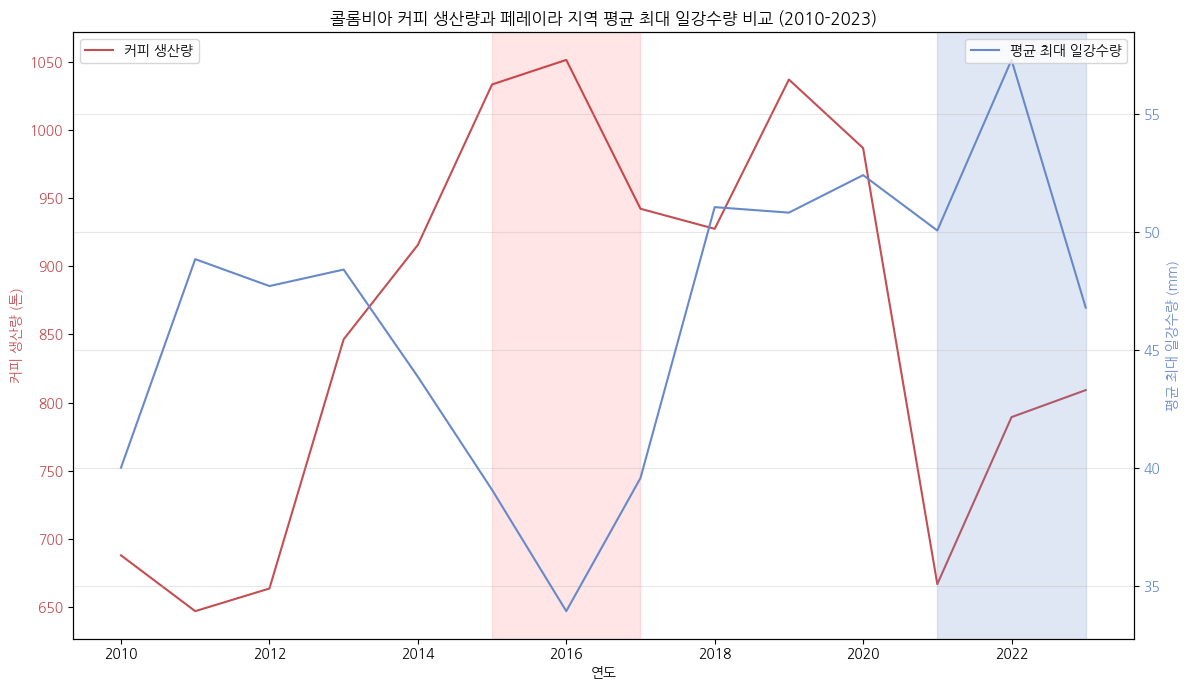

In [939]:
# 2010-2023년 데이터 필터링
coffee_filtered = coffee_yearly.loc[2010:2023]
rain_filtered = yearly_rain.loc[2010:2023]

# 그래프 생성
plt.figure(figsize=(12, 7))

ax1 = plt.gca()  # 현재 Axes 가져오기
ax1.plot(coffee_filtered.index, coffee_filtered.values, '#C44E52', label='커피 생산량')
ax1.set_xlabel('연도')
ax1.set_ylabel('커피 생산량 (톤)', color='#C44E52')
ax1.tick_params(axis='y', labelcolor='#C44E52')

ax2 = ax1.twinx()  # 두 번째 y축
ax2.plot(rain_filtered.index, rain_filtered.values, '#6789CA', label='평균 최대 일강수량')
ax2.set_ylabel('평균 최대 일강수량 (mm)', color='#6789CA')
ax2.tick_params(axis='y', labelcolor='#6789CA')

# 범례 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.axvspan(2015, 2017, color='r', alpha=0.1)
plt.axvspan(2021, 2023, color='#6789CA', alpha=0.2)

plt.title('콜롬비아 커피 생산량과 페레이라 지역 평균 최대 일강수량 비교 (2010-2023)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [940]:
# 커피 생산량과 평균 최대 일강수량의 상관계수 계산
correlation = coffee_filtered.corr(rain_filtered)

# 상관계수 출력
print(f'상관계수: {correlation}')

상관계수: -0.3020292125748813


그래프를 보면 다음과 같은 관계를 볼 수 있습니다:
1. 커피 생산량 (파란색 선):
2010-2012년: 감소 추세
2012-2014년: 급격한 증가
2014년 이후: 변동성을 보이며 전반적으로 감소 추세
2020년 이후: 다시 소폭 증가
2. 평균 최대 일강수량 (빨간색 선):
연도별로 큰 변동성을 보임
특히 2011년과 2017년에 높은 강수량 기록
최근 들어 강수량의 변동폭이 커짐
3. 두 변수의 관계:
강수량이 매우 높을 때 (예: 2011년) 커피 생산량이 감소하는 경향
극단적인 강수량은 커피 생산에 부정적 영향을 미칠 수 있음
하지만 적절한 강수량은 생산에 필요하므로, 단순한 반비례 관계는 아님
이 분석을 통해 과도한 강수량은 커피 생산에 부정적 영향을 미칠 수 있으나, 생산량 변화에는 강수량 외에도 다른 여러 요인들이 복합적으로 작용한다는 것을 알 수 있습니다.

년 생산량과 월 강수량 <hr>

데이터 전처리

In [941]:
# 1. 커피 생산량 데이터 처리
# 'Element' 컬럼에서 'Yield' 값만 필터링하여 커피 생산량 데이터만 남기고, 
# 'Year'를 인덱스로 설정하여 'Value' (커피 생산량) 값을 Series로 만듭니다.
coffee_prod = coffee[coffee['Element'] == 'Yield'].set_index('Year')['Value']

# 2. 최대 일강수량 데이터 처리
# '시간(UTC)'과 '최대 일강수량' 컬럼만 선택하여, '시간(UTC)'을 인덱스로 설정합니다.
UTC_rain = data[['시간(UTC)', '최대 일강수량']]
UTC_rain = UTC_rain.set_index('시간(UTC)')

In [942]:
# 월별 생산량 데이터 생성
coffee_monthly = pd.DataFrame()  # 빈 데이터프레임 생성
for year in coffee_prod.index:  # 커피 생산량 데이터의 각 연도에 대해 반복
    monthly_data = pd.DataFrame(
        {'Value': [coffee_prod.loc[year]] * 12},  # 해당 연도의 커피 생산량을 12개월에 걸쳐 같은 값으로 할당
        index=pd.date_range(start=f'{year}-01-01', periods=12, freq='ME')  # 한 해의 12개월을 생성, freq='ME'는 각 월의 마지막 날을 인덱스로 생성
    )
    coffee_monthly = pd.concat([coffee_monthly, monthly_data])  # 생성된 월별 데이터를 coffee_monthly 데이터프레임에 이어붙입니다.

In [943]:
# 데이터 필터링 (2010-2023)
# '2010'년부터 '2023'년까지의 데이터를 선택하여 필터링합니다.
coffee_monthly_filtered = coffee_monthly['2010':'2023']
rain_filtered = UTC_rain['2010':'2023']  # 최대 일강수량 데이터도 동일하게 2010-2023 기간으로 필터링
display(coffee_monthly_filtered)
rain_filtered

,Value
2010-01-31,688.1
2010-02-28,688.1
2010-03-31,688.1
2010-04-30,688.1
2010-05-31,688.1
...,...
2023-08-31,809.2
2023-09-30,809.2
2023-10-31,809.2
2023-11-30,809.2


,최대 일강수량
시간(UTC),
2010-01-31,11.3
2010-02-28,25.2
2010-03-31,37.9
2010-04-30,83.4
2010-05-31,65.8
...,...
2023-08-31,47.1
2023-09-30,17.3
2023-10-31,38.9


그래프 생성

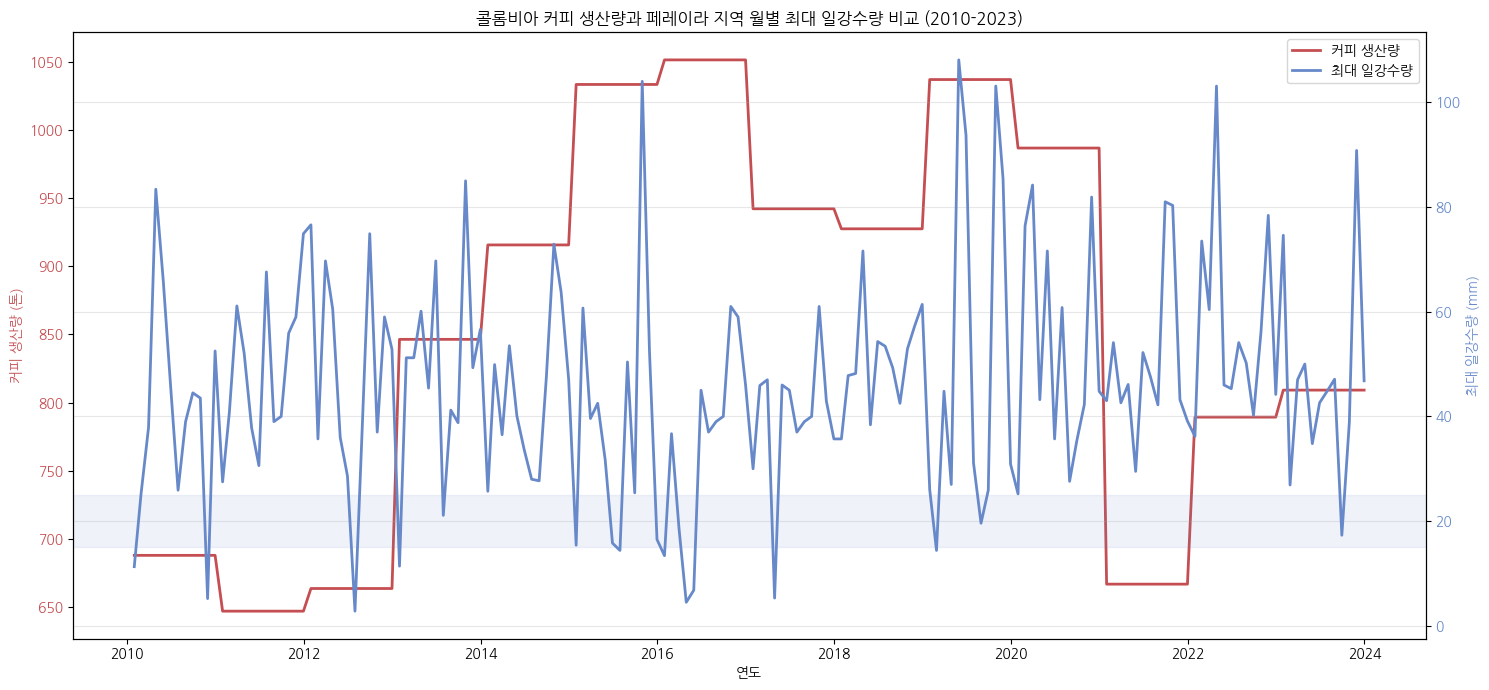

In [944]:
# 그래프 그리기
plt.figure(figsize=(15, 7))  # 그래프 크기 설정

# 커피 생산량 그래프 (왼쪽 y축)
ax1 = plt.gca()  # 현재 Axes 객체를 얻어옵니다.
line1 = ax1.plot(coffee_monthly_filtered.index, coffee_monthly_filtered['Value'], 
                 '#C44E52', label='커피 생산량', linewidth=2)  # 커피 생산량 그래프를 파란색으로 그립니다.
ax1.set_xlabel('연도')  # x축 레이블 설정
ax1.set_ylabel('커피 생산량 (톤)', color='#C44E52')  # 왼쪽 y축 레이블 설정 (파란색)
ax1.tick_params(axis='y', labelcolor='#C44E52')  # 왼쪽 y축의 tick 색상을 파란색으로 설정

# 두 번째 y축 생성
ax2 = ax1.twinx()  # 오른쪽 y축을 추가하기 위해 twin axes 생성

# 최적 강수량 y축 범위에 색상 표시 (20-25 범위)
ax2.axhspan(15, 25, color='#6789CA', alpha=0.1)  # 20-25 범위에 빨간색 배경 추가

# 최대 일강수량 그래프 (오른쪽 y축)
line2 = ax2.plot(rain_filtered.index, rain_filtered['최대 일강수량'], 
                 '#6789CA', label='최대 일강수량', linewidth=2)  # 최대 일강수량 그래프를 빨간색으로 그립니다.
ax2.set_ylabel('최대 일강수량 (mm)', color='#6789CA')  # 오른쪽 y축 레이블 설정 (빨간색)
ax2.tick_params(axis='y', labelcolor='#6789CA')  # 오른쪽 y축의 tick 색상을 빨간색으로 설정

# x축 설정
plt.xticks(rotation=45)  # x축 레이블을 45도 회전시켜서 가독성을 높입니다.

# 범례 합치기
lines = line1 + line2  # 커피 생산량과 최대 일강수량 그래프의 라인을 합침
labels = [l.get_label() for l in lines]  # 각 라인의 레이블을 추출
ax1.legend(lines, labels, loc='upper right')  # 범례를 그래프의 오른쪽 상단에 위치시킴

# 그래프 제목과 스타일 설정
plt.title('콜롬비아 커피 생산량과 페레이라 지역 월별 최대 일강수량 비교 (2010-2023)')  # 제목 설정
plt.grid(True, alpha=0.3)  # 배경 그리드 추가 (불투명도 0.3으로 설정)
plt.tight_layout()  # 레이아웃이 겹치지 않도록 자동으로 조정
plt.show()  # 그래프 출력

<pre>
📈 주요 관찰점
전반적인 추세

**커피 생산량(파란색 선)**은 2013년 이후 점진적으로 증가하는 경향을 보임.
**강수량(빨간색 선)**은 변동성이 매우 크며, 특정 기간(2016년, 2020년, 2023년)에 급격한 증가가 있음.
특정 연도별 특징

2010-2012년: 강수량이 매우 불규칙하며, 커피 생산량도 비교적 낮은 수준 유지.
2013-2015년: 커피 생산량이 점진적으로 증가하는 동안 강수량은 변동이 심함.
2016년: 강수량이 급등한 시기가 많으며, 커피 생산량도 급격한 변화가 있음.
2019-2020년: 강수량이 줄어들면서, 커피 생산량은 안정적인 증가세 유지.
2022-2023년: 강수량이 급변하면서, 일부 구간에서 커피 생산량이 감소하는 패턴이 보임.
강수량과 커피 생산량의 관계

2016년과 2023년: 강수량이 급증할 때, 커피 생산량이 변동하는 경향을 보임.
강수량이 일정 수준 이하(붉은 음영 영역)로 낮아질 경우: 커피 생산량이 유지되거나 증가하는 모습이 나타남.
</pre>

- 2010년 11월
메데진시 인근에서 산사태로 약 150명이 매몰되는 등 피해가 심각했습니다. 
OVERSEAS.MOFA.GO.KR

- 2017년 3월
콜롬비아 남서부의 모코아 시에서 폭우로 산사태가 발생하여 333명이 사망하고 수백 명이 실종되었습니다. 
STARTNETWORK.ORG

- 2021년 11월
콜롬비아 남서부 지역에서 며칠 간의 폭우로 산사태가 발생하여 최소 6명이 사망하고 11명이 부상했으며, 20여 명이 실종되었습니다.

- 2022년 2월
콜롬비아 중서부 페레이라와 도스케브라다스 지역에서 폭우로 인한 산사태로 최소 14명이 사망하고 30여 명이 부상한 사건이 있었습니다.

- 2023년 1월
콜롬비아 북서부 초코주와 안티오키아주를 잇는 도로에서 산사태가 발생하여 최소 33명이 사망했습니다.

* 이러한 사건들은 콜롬비아에서 폭우로 인한 산사태와 홍수로 인명 피해가 발생한 주요 사례들입니다.

In [945]:
coffee_price = pd.read_excel('data/커피_원두_가격_합본.xlsx')
# UTC_rain = data[['시간(UTC)','최대 일강수량']]

In [946]:
coffee_price.head()

,기간(년),평균가,전년평균가,전년대비,등락률(%),종가,환산가($/ton)
0,2010,213.19,0.00,213.19,0.00,240.50,4699.99
1,2011,253.64,213.19,40.45,18.97,226.85,5591.75
2,2012,175.58,253.64,-78.06,-30.78,143.80,3870.84
3,2013,126.58,175.58,-49.00,-27.91,110.70,2790.58
4,2014,177.84,126.58,51.26,40.50,166.60,3920.66


,기간(년),평균가
0,2010,213.19
1,2011,253.64
2,2012,175.58
3,2013,126.58
4,2014,177.84
5,2015,132.48
6,2016,136.21
7,2017,132.96
8,2018,112.65
9,2019,101.70


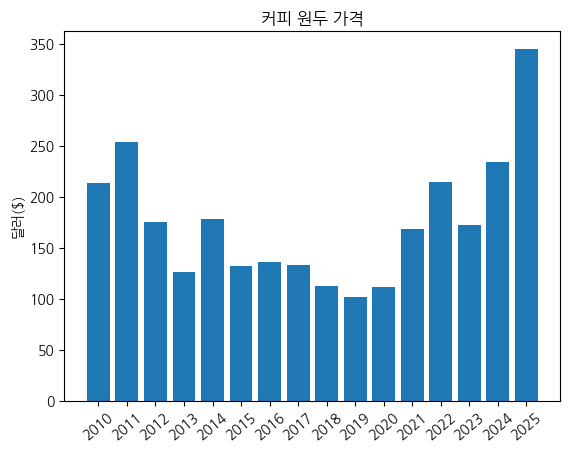

In [947]:
coffee_price = coffee_price[['기간(년)','평균가']]
display(coffee_price)
plt.bar(coffee_price['기간(년)'], coffee_price['평균가'])

plt.xticks(coffee_price['기간(년)'], rotation=40)
plt.ylabel('달러($)')
plt.title('커피 원두 가격')

plt.show()